In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv


In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#pd
data = pd.read_csv("/kaggle/input/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
data.shape

(693071, 57)

In [5]:
data.sample(5).T

,502823,326083,96081,615291,176985
id,33ccfc2b-5590-456a-b7a4-0810312f7d94,f947475c-4c66-4945-8d4c-6a00f82ecc63,3e00c3df-e850-4b25-a28f-6c2cc6449f91,e3dc8c2d-5bd8-4c38-b3ec-cfe172aa427d,0dd5cb69-e265-45ec-b897-224479250a80
timestamp,1545112512.0,1543274475.0,1543441089.0,1543362502.0,1544867705.0
hour,5,23,21,23,9
day,18,26,28,27,15
month,12,11,11,11,12
datetime,2018-12-18 05:55:11,2018-11-26 23:21:14,2018-11-28 21:38:08,2018-11-27 23:48:22,2018-12-15 09:55:05
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Fenway,Financial District,West End,North End,Fenway
destination,West End,Northeastern University,South Station,Theatre District,Back Bay
cab_type,Uber,Uber,Lyft,Uber,Lyft


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
numerical = data.select_dtypes(["float64","int64"]).columns
numerical

Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [8]:
categorical = data.select_dtypes(["object"]).columns
categorical

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [9]:
len(categorical) + len(numerical) == len(data.columns)

True

In [10]:
for col in categorical:
    print('{} : {} unique values'.format(col, data[col].nunique()))

id : 693071 unique values
datetime : 31350 unique values
timezone : 1 unique values
source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
product_id : 13 unique values
name : 13 unique values
short_summary : 9 unique values
long_summary : 11 unique values
icon : 7 unique values


timezone : 1 unique values

In [11]:
data = data.drop(columns=["id", "timestamp", "timezone", "product_id"])

In [12]:
data.duplicated().sum()

1493

In [13]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicated rows: ", duplicate_rows_data.shape)

number of duplicated rows:  (1493, 53)


In [14]:
data = data.drop_duplicates()
data.shape

(691578, 53)

In [15]:
data.isnull().sum()

hour                               0
day                                0
month                              0
datetime                           0
source                             0
destination                        0
cab_type                           0
name                               0
price                          54542
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
t

In [16]:
data  = data.dropna()

In [17]:
data.isnull().sum()

hour                           0
day                            0
month                          0
datetime                       0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

No null values anymore 

In [18]:
numerical = data.select_dtypes(["float64","int64"]).columns
numerical

Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [19]:
categorical = data.select_dtypes(["object"]).columns
categorical

Index(['datetime', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [20]:
for col in categorical:
    print('{} : {} unique values'.format(col, data[col].nunique()))

datetime : 31350 unique values
source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
name : 12 unique values
short_summary : 9 unique values
long_summary : 11 unique values
icon : 7 unique values


### Create 'START_DATE'

In [21]:
data['datetime'].head()

0    2018-12-16 09:30:07
1    2018-11-27 02:00:23
2    2018-11-28 01:00:22
3    2018-11-30 04:53:02
4    2018-11-29 03:49:20
Name: datetime, dtype: object

In [22]:

data["START_DATE"] = pd.to_datetime(data['datetime'], format='%Y/%m/%d %H:%M')

In [23]:
data["START_DATE"].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: START_DATE, dtype: datetime64[ns]

### extract hours, day and month, weekday and day of week from START_DATE

In [24]:
data['HOURS'] = [x.hour for x in data['START_DATE']]
data['DAY'] = [x.day for x in data['START_DATE']]
data['MONTH'] = [x.month for x in data['START_DATE']]
data['DAY_OF_WEEK'] = [x.day_of_week for x in data['START_DATE']]
data["WEEKDAY"] = [calendar.day_name[x.day_of_week] for x in data['START_DATE']]

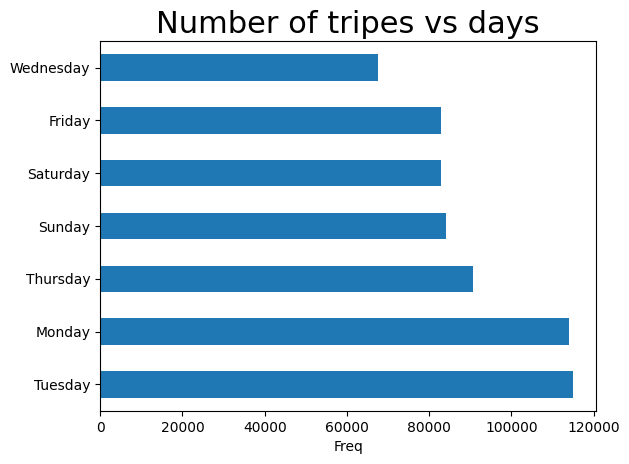

In [25]:

data["WEEKDAY"].value_counts().plot(kind='barh')
plt.xlabel("Freq")
plt.title("Number of tripes vs days", fontsize=22)
plt.show()

### create column named HourRange to group hours



In [26]:
data['hourRange'] = data.hour.apply( 
                    lambda x: ('00 - 03 am' if 0<=x<=3 else 
                    ('04 - 07 am' if  4<=x<=7 else 
                    ('08 - 11 am' if  8<=x<=11 else 
                    ('12 - 15 am' if 12<=x<=15 else 
                    ('16 - 19 am' if 16<=x<=19 else 
                    ('20 - 23 am' if 20<=x<=723 else 
                    'missed')))))))
data["hourRange"].sample(10)

121091    16 - 19 am
442606    12 - 15 am
177498    16 - 19 am
269567    00 - 03 am
603297    04 - 07 am
392695    20 - 23 am
279832    04 - 07 am
329801    12 - 15 am
658315    16 - 19 am
56279     20 - 23 am
Name: hourRange, dtype: object

In [27]:
data.sample(3)

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,START_DATE,HOURS,DAY,MONTH,DAY_OF_WEEK,WEEKDAY,hourRange
17486,22,2,12,2018-12-02 22:48:02,North End,Theatre District,Lyft,Shared,5.0,1.54,...,1543748400,50.11,1543788000,2018-12-02 22:48:02,22,2,12,6,Sunday,20 - 23 am
353093,3,29,11,2018-11-29 03:56:07,Beacon Hill,Haymarket Square,Uber,UberXL,17.0,1.35,...,1543392000,35.75,1543420800,2018-11-29 03:56:07,3,29,11,3,Thursday,00 - 03 am
67279,20,14,12,2018-12-14 20:45:14,Beacon Hill,South Station,Lyft,Lux Black,22.5,1.49,...,1544788800,43.71,1544817600,2018-12-14 20:45:14,20,14,12,4,Friday,20 - 23 am


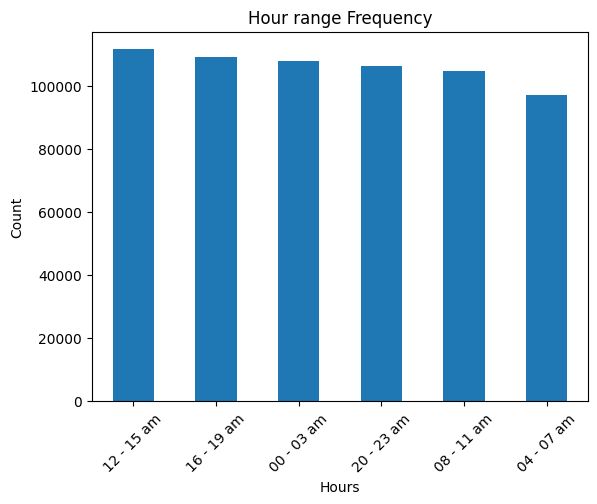

In [28]:
data["hourRange"].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Hours')
plt.xticks(rotation=45)
plt.title('Hour range Frequency')

plt.show()

### remove collinear variables

In [29]:
numerical = data.select_dtypes(['int64', 'float64']).columns 

<AxesSubplot: >

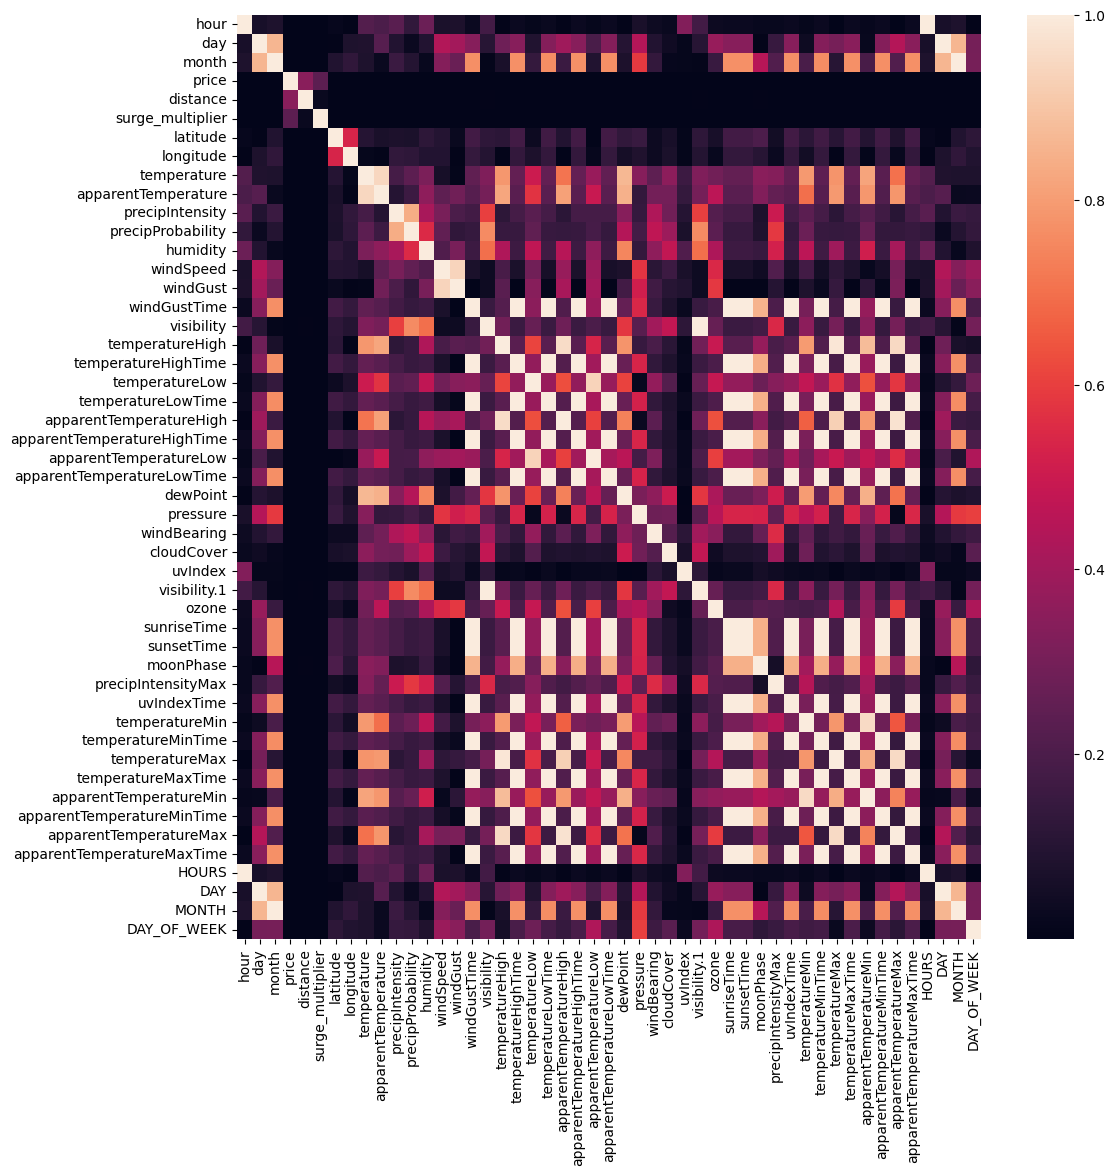

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr().abs())

There are a mot of cases where the correlation equal to one . We need to remove one of each of those Columns . Because they do almost the same role.

In [31]:
# Threshold for removing correlated variables
threshold = 0.9
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [col for col in upper.columns if any(upper[col] > threshold) ]
print('There are %d columns to remove.' % (len(to_drop)))
to_drop

There are 22 columns to remove.


['apparentTemperature',
 'windGust',
 'temperatureHighTime',
 'temperatureLowTime',
 'apparentTemperatureHigh',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureLowTime',
 'visibility.1',
 'sunriseTime',
 'sunsetTime',
 'uvIndexTime',
 'temperatureMinTime',
 'temperatureMax',
 'temperatureMaxTime',
 'apparentTemperatureMin',
 'apparentTemperatureMinTime',
 'apparentTemperatureMax',
 'apparentTemperatureMaxTime',
 'HOURS',
 'DAY',
 'MONTH']

In [32]:
data = data.drop(columns = to_drop)
print('data shape after removing collinear vaiables: ', data.shape)

data shape after removing collinear vaiables:  (637036, 38)


In [33]:
data.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,START_DATE,DAY_OF_WEEK,WEEKDAY,hourRange
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,0.72,0,303.8,0.30,0.1276,39.89,2018-12-16 09:30:07,6,Sunday,08 - 11 am
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,1.00,0,291.1,0.64,0.1300,40.49,2018-11-27 02:00:23,1,Tuesday,00 - 03 am
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,0.03,0,315.7,0.68,0.1064,35.36,2018-11-28 01:00:22,2,Wednesday,00 - 03 am
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.00,0,291.1,0.75,0.0000,34.67,2018-11-30 04:53:02,4,Friday,04 - 07 am
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.44,0,347.7,0.72,0.0001,33.10,2018-11-29 03:49:20,3,Thursday,00 - 03 am


## Handling outliers

In [34]:
def outliers(col):
    global col_out
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    IQR = Q3-Q1
    upper_limit = Q3 + (IQR*1.5)
    lower_limit = Q1 - (IQR*1.5)
    df1 = data[ (data[col] > upper_limit) | (data[col] < lower_limit)] 
    data.loc[ (data[col] > upper_limit) | (data[col] < lower_limit),col]=np.nan
    if df1.shape[0] != 0:
        print(col, ":", df1.shape)
        print('-----------------')
        col_out.append(col)
    return col_out, df1.shape[0]

In [35]:
numerical = data.select_dtypes(['int64', 'float64']).columns
print("number of outliers for each column")
print('-----------------')
l = []
col_out = []
for col in numerical:
    col_out, val = outliers(col)
    l.append(val)

number of outliers for each column
-----------------
price : (5589, 38)
-----------------
distance : (7205, 38)
-----------------
surge_multiplier : (20975, 38)
-----------------
latitude : (81448, 38)
-----------------
temperature : (33707, 38)
-----------------
precipIntensity : (138505, 38)
-----------------
precipProbability : (138505, 38)
-----------------
visibility : (125628, 38)
-----------------
temperatureHigh : (150681, 38)
-----------------
dewPoint : (34294, 38)
-----------------
uvIndex : (146579, 38)
-----------------
temperatureMin : (4052, 38)
-----------------


In [36]:
col_out

['price',
 'distance',
 'surge_multiplier',
 'latitude',
 'temperature',
 'precipIntensity',
 'precipProbability',
 'visibility',
 'temperatureHigh',
 'dewPoint',
 'uvIndex',
 'temperatureMin']

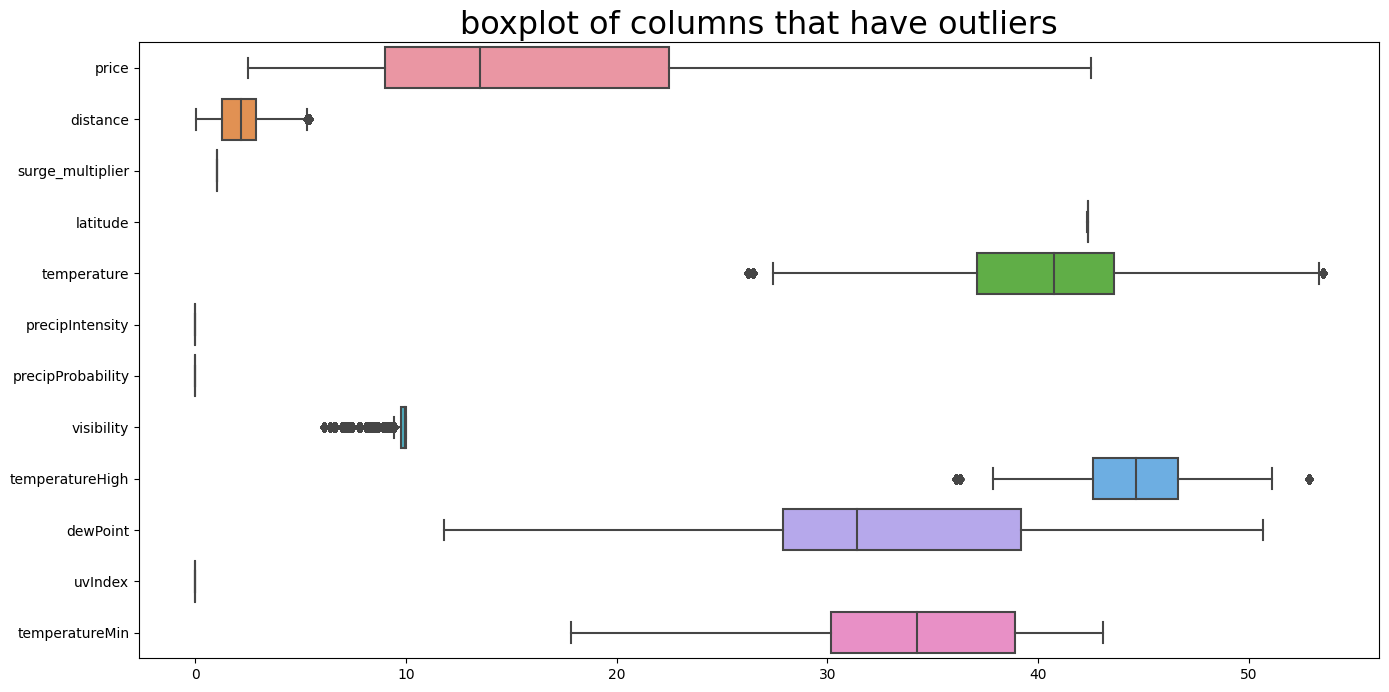

In [37]:
plt.figure(figsize=(16,8))
plt.title("boxplot of columns that have outliers", fontsize = 23)
sns.boxplot(data = data[list(col_out)], orient='h')
plt.show()

In [38]:
print("number of column that have outliers are : ", len(col_out))
print("number of column that doesn't have outliers are : ", len(numerical)-len(col_out))

number of column that have outliers are :  12
number of column that doesn't have outliers are :  15


In [39]:
l = list(filter(lambda num: num != 0, l))
l = [i/data.shape[0] for i in l]


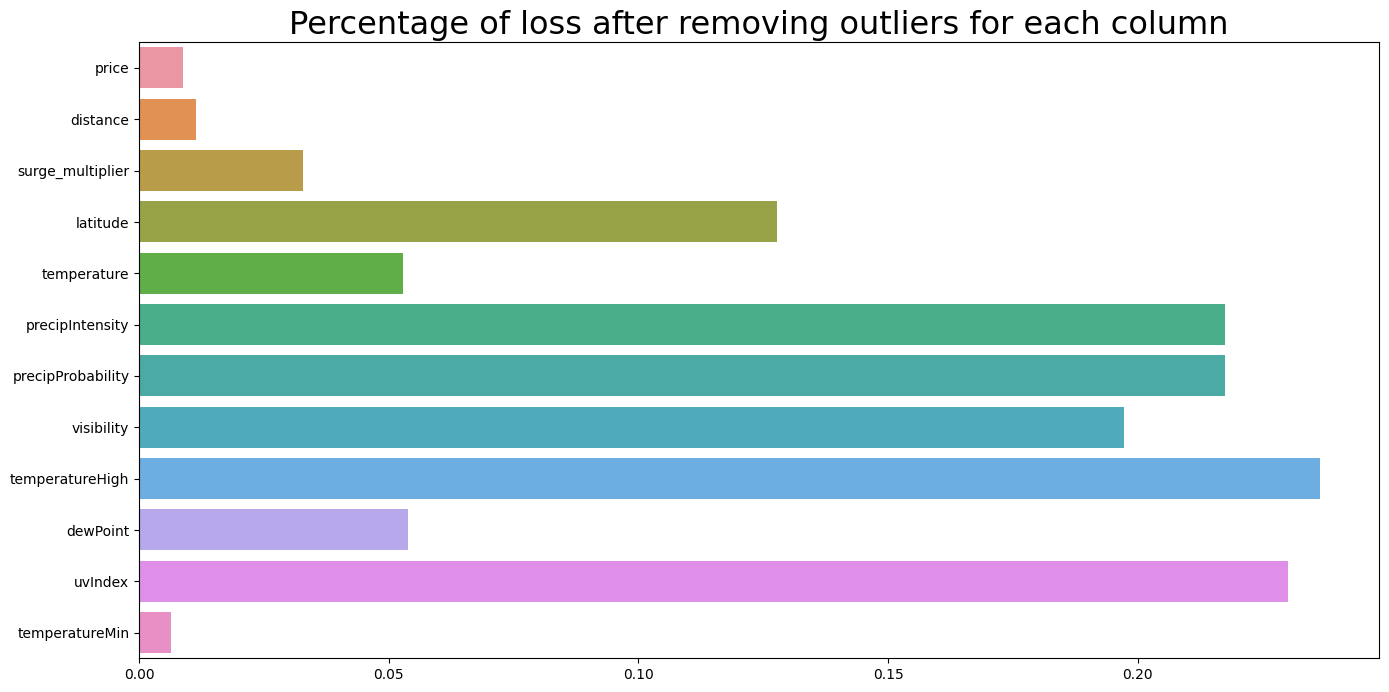

In [40]:
plt.figure(figsize = (16,8))
sns.barplot(x=l, y=col_out)
plt.title("Percentage of loss after removing outliers for each column", fontsize=23)
plt.show()

In [41]:
print('Before deleting outliers: ',data.shape)
data.dropna(inplace=True)
print('After deleting outliers: ',data.shape)   

Before deleting outliers:  (637036, 38)
After deleting outliers:  (216135, 38)


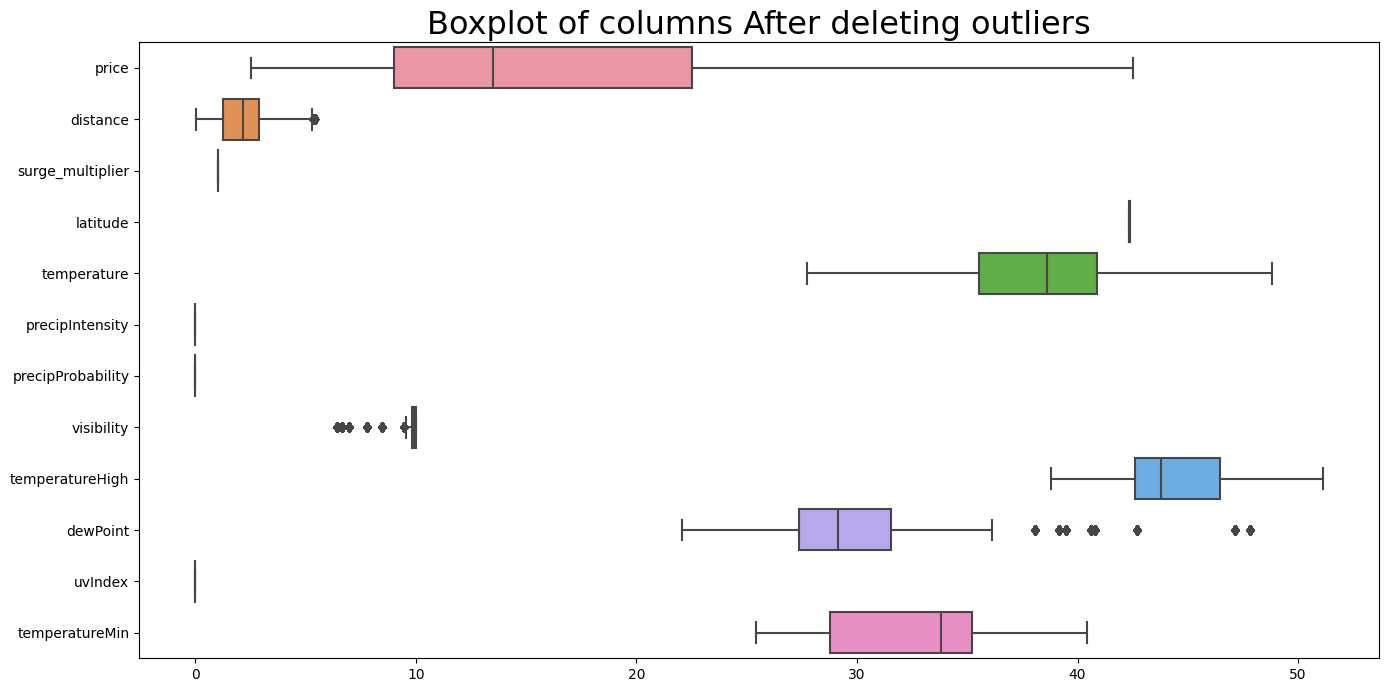

In [42]:
plt.figure(figsize=(16,8))
plt.title("Boxplot of columns After deleting outliers", fontsize = 23)
sns.boxplot(data=data[['price','distance','surge_multiplier','latitude','temperature','precipIntensity','precipProbability','visibility','temperatureHigh','dewPoint','uvIndex','temperatureMin']], orient="h")
plt.show()

new outliers have shown up. maybe I should romove them too hhhhhhhhhhh. I mean Ive alredy have cut more than 70% of the data . 

!!!!I'm learning here so maybe this notebook is not to learn from 

In [43]:
data.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,START_DATE,DAY_OF_WEEK,WEEKDAY,hourRange
11,19.0,28.0,11.0,2018-11-28 19:23:07,Back Bay,Northeastern University,Lyft,Lyft,7.0,1.08,...,1.00,0.0,354.2,0.72,0.0000,33.82,2018-11-28 19:23:07,2.0,Wednesday,16 - 19 am
12,22.0,30.0,11.0,2018-11-30 22:13:01,North End,West End,Uber,UberXL,12.0,1.11,...,1.00,0.0,281.8,0.79,0.0003,28.79,2018-11-30 22:13:01,4.0,Friday,20 - 23 am
17,19.0,29.0,11.0,2018-11-29 19:18:00,North End,West End,Uber,UberPool,5.5,1.11,...,0.53,0.0,309.7,0.75,0.0000,35.35,2018-11-29 19:18:00,3.0,Thursday,16 - 19 am
19,6.0,16.0,12.0,2018-12-16 06:15:11,North Station,Haymarket Square,Lyft,Lyft XL,11.0,0.72,...,0.06,0.0,298.7,0.30,0.1246,38.94,2018-12-16 06:15:11,6.0,Sunday,04 - 07 am
20,19.0,27.0,11.0,2018-11-27 19:18:22,North Station,Haymarket Square,Lyft,Lux Black,16.5,0.72,...,0.81,0.0,313.6,0.68,0.1433,36.13,2018-11-27 19:18:22,1.0,Tuesday,16 - 19 am


# Visualisation

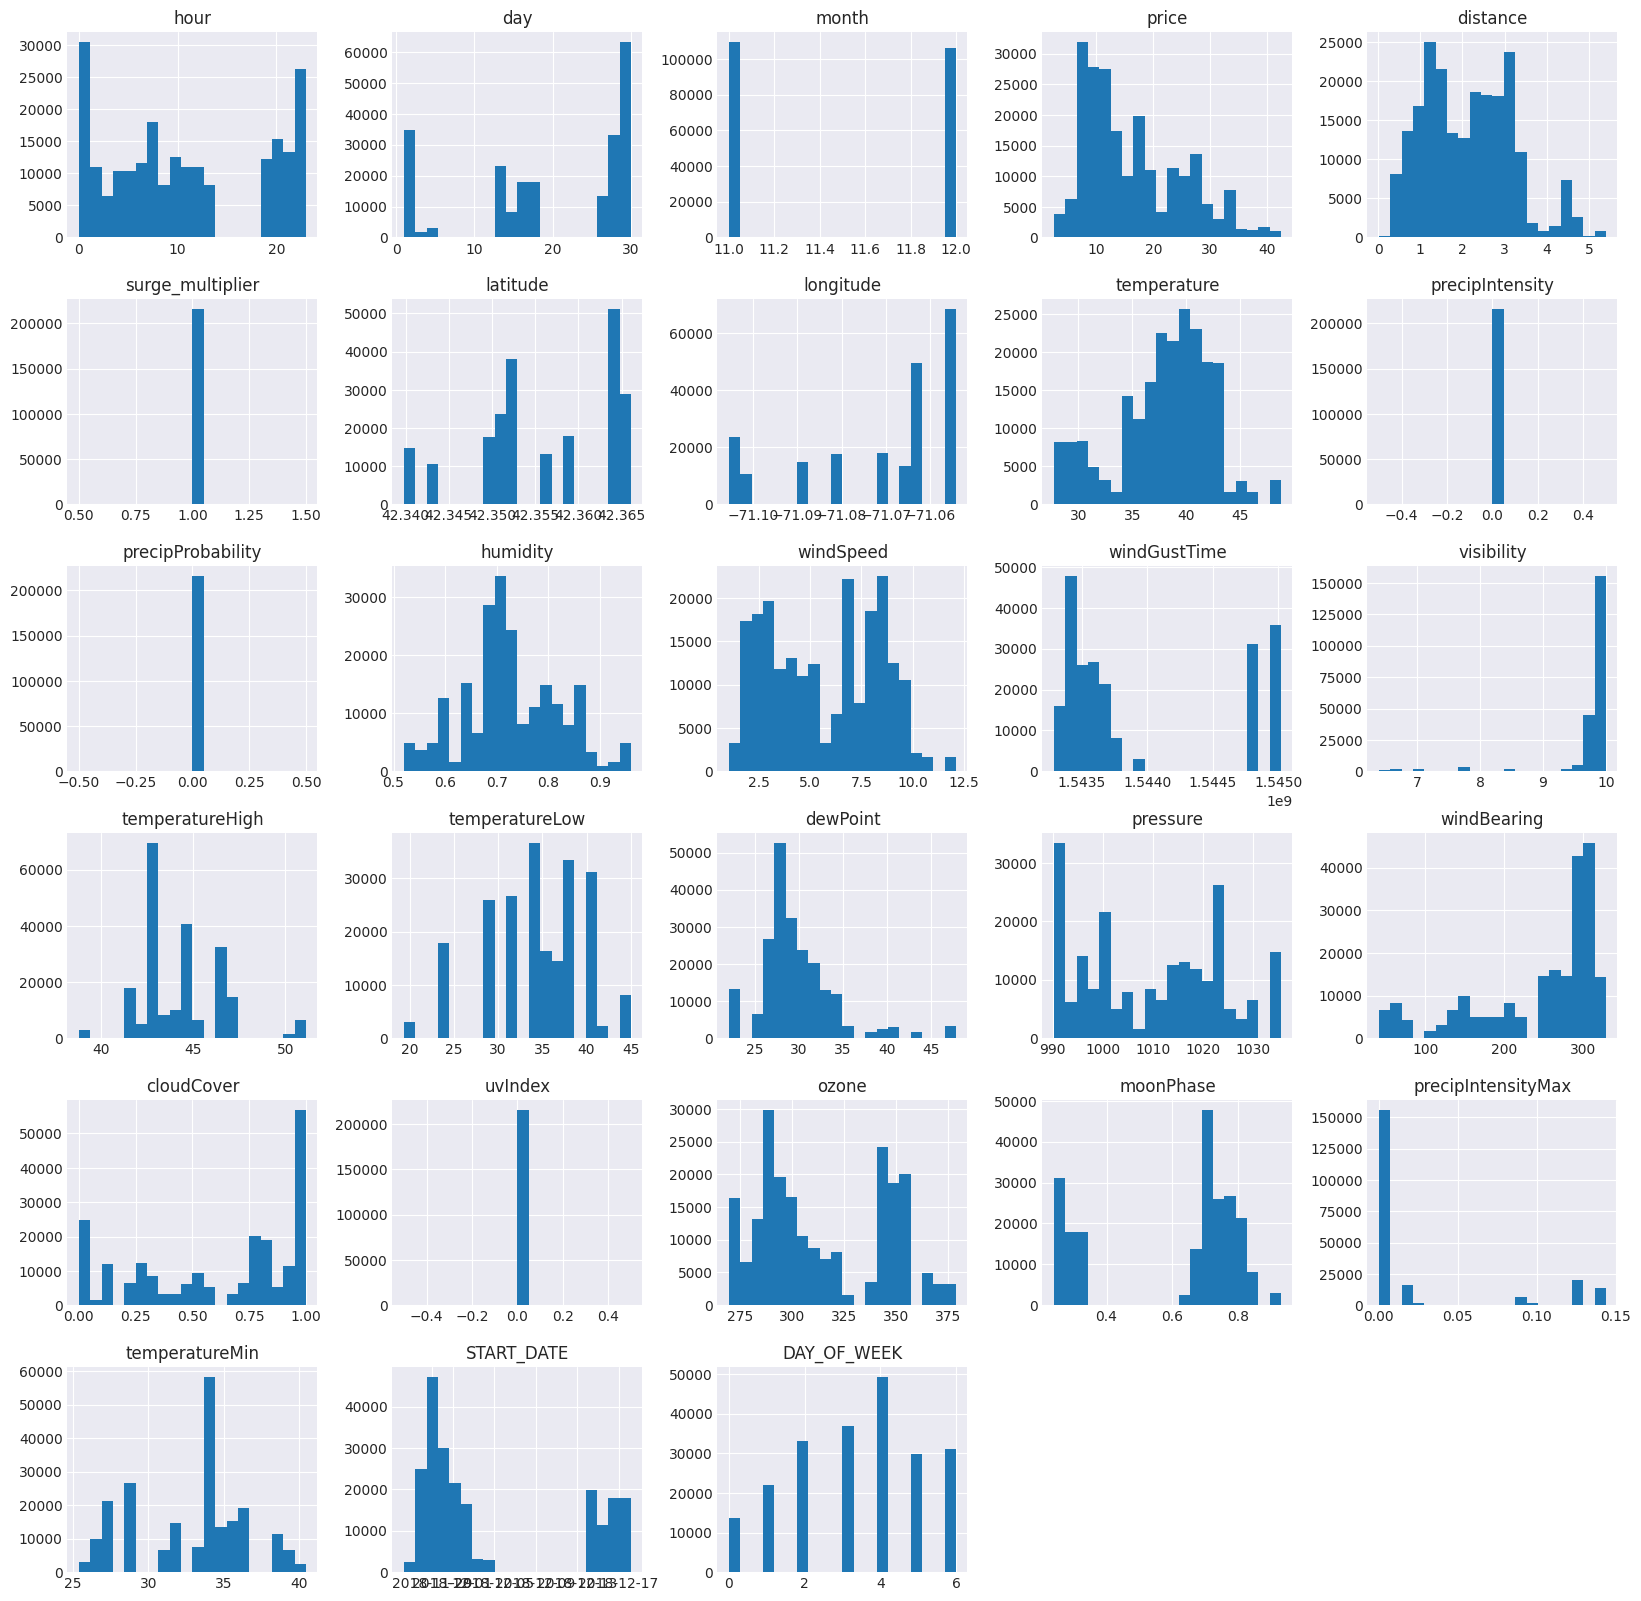

In [54]:
# Distribuation of features
style.use("seaborn-darkgrid")
data.hist(figsize=(20,20), bins=20)
plt.show()

### Distribution of HourRange

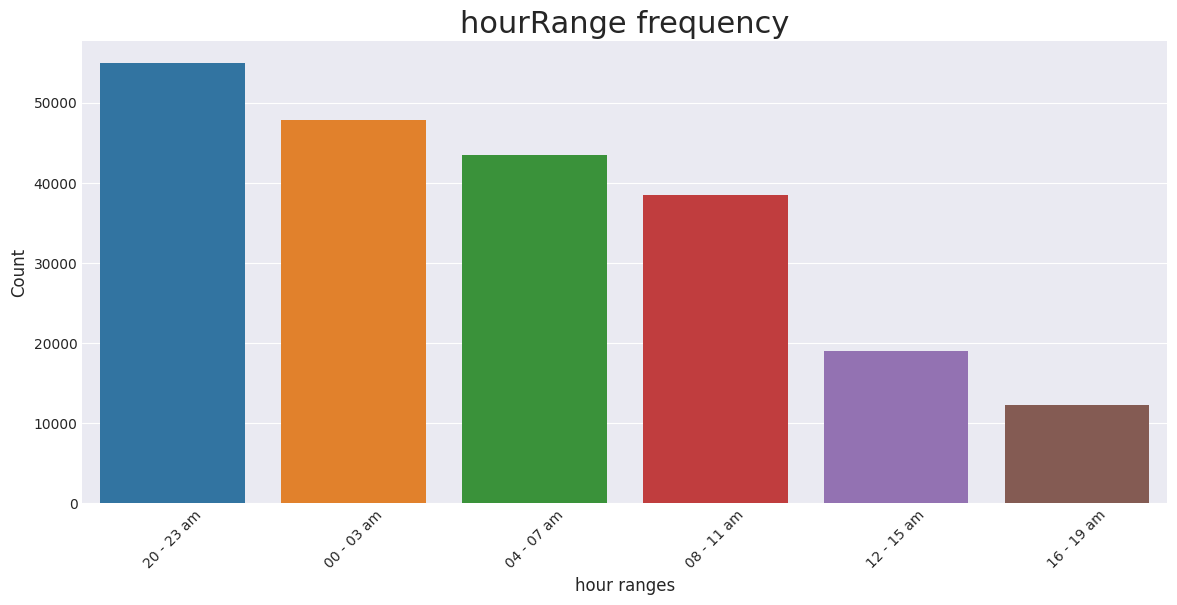

In [72]:
plt.figure(figsize=(14,6))

sns.barplot(x = data.hourRange.value_counts().index, y = data.hourRange.value_counts().values)
plt.title("HourRange Frequency")
plt.xlabel("hour ranges", fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("hourRange frequency", fontsize=22)
plt.xticks(rotation=45)
plt.show()

### Percentage count of source

****

In [80]:
data["source"].value_counts().reset_index()

,index,source
0,North Station,18705
1,West End,18621
2,Haymarket Square,18607
3,North End,18597
4,South Station,18386
5,Beacon Hill,18047
6,Fenway,18018
7,Northeastern University,17792
8,Boston University,17744
9,Theatre District,17686


In [89]:
# Creating lists for source and counts
src_freq = list(data["source"].value_counts())
src = list(data['source'].unique())
src

['Back Bay',
 'North End',
 'North Station',
 'Beacon Hill',
 'Boston University',
 'Fenway',
 'South Station',
 'Theatre District',
 'West End',
 'Financial District',
 'Northeastern University',
 'Haymarket Square']

<AxesSubplot: xlabel='count', ylabel='source'>

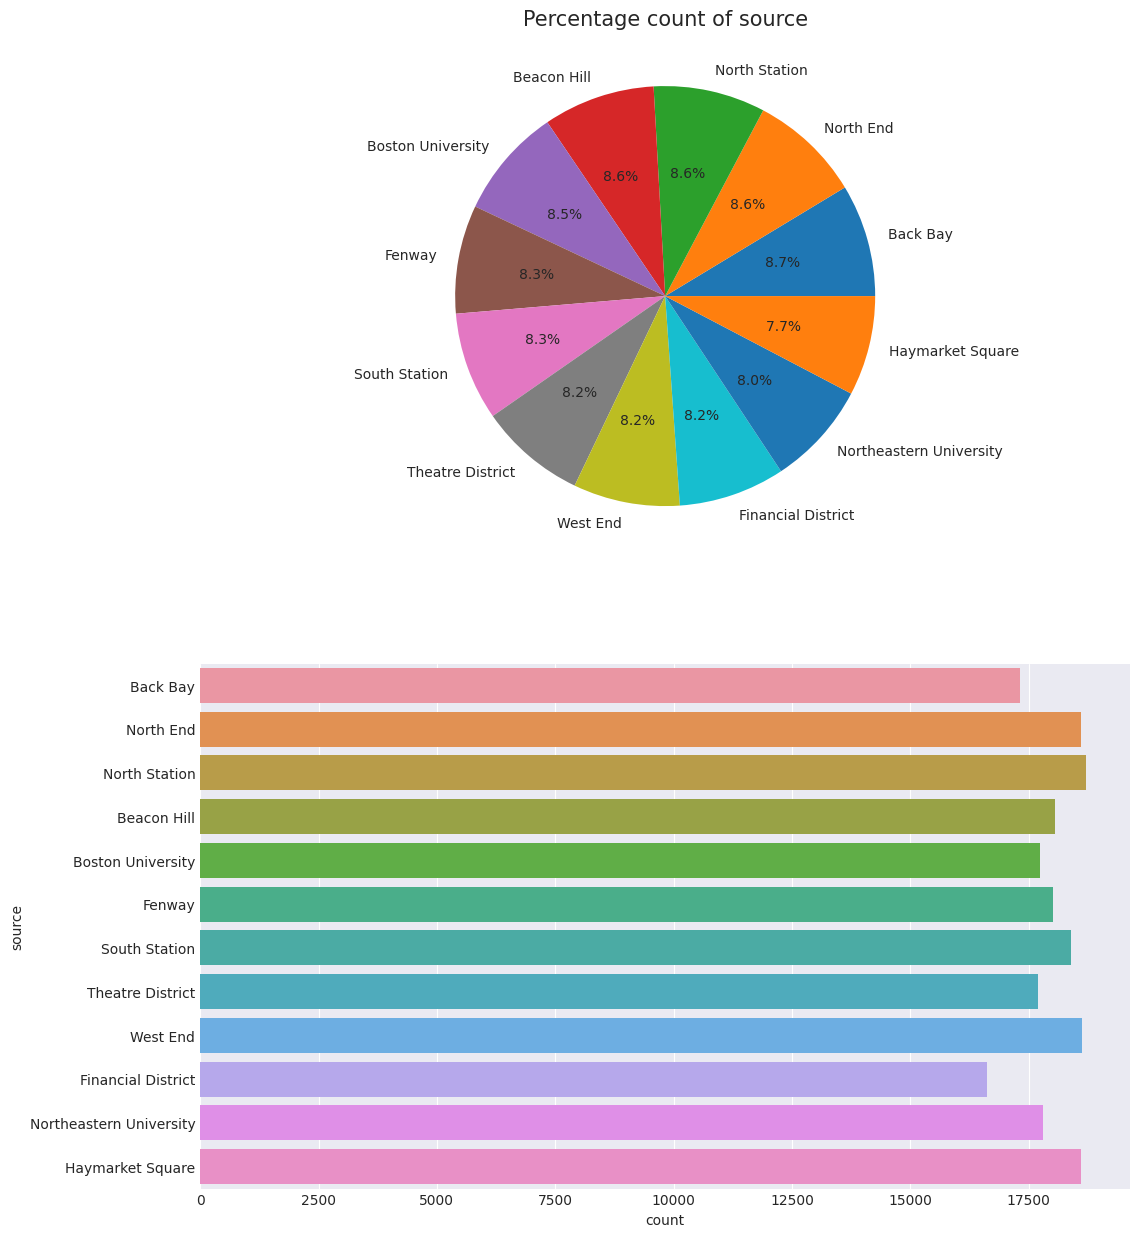

In [149]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  '.format(p=pct)
    return my_autopct


plt.show()
fig, ax = plt.subplots(2,1, figsize=(12,15))
ax[0].pie(src_freq,labels=src,autopct=make_autopct(src_freq))

# # Adding legend
# ax[0].legend(title='source',
#             loc="upper right",
#             bbox_to_anchor=(2,1));
ax[0].set_title("Percentage count of source", fontsize=15)

sns.countplot(y='source', data=data, ax=ax[1])

### The average price by distance



# Experimenting 


In [44]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman','zuhir'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip','Superman'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT ,16]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25 00:00:00
2,Catwoman,Bullwhip,NaT
3,zuhir,Superman,16


In [45]:
data['name']=="zuhir"

11        False
12        False
17        False
19        False
20        False
          ...  
693065    False
693066    False
693067    False
693069    False
693070    False
Name: name, Length: 216135, dtype: bool

In [46]:
df.loc[df['name']=="zuhir",'born'] = np.nan
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25 00:00:00
2,Catwoman,Bullwhip,NaT
3,zuhir,Superman,NaN


In [47]:
df.loc[1,'name']='Gogo'
df

,name,toy,born
0,Alfred,NaN,NaT
1,Gogo,Batmobile,1940-04-25 00:00:00
2,Catwoman,Bullwhip,NaT
3,zuhir,Superman,NaN


In [48]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [49]:
df.loc['viper'].shape

(2,)

In [50]:
df.loc[df]

ValueError: Cannot index with multidimensional key